# TECH 2 mandatory assignment - Part B
Solution

First, I need to import my functions, as well as numpy

In [215]:
import numpy as np
from part_A import std_builtin, std_loops


Next, I need to read data from `data.csv` file. 
I start by creating 3 lists, `large`, `medium` and `small` and store respectively data in columns to the lists.
Where large is a 10 thousand large list.

In [216]:
import csv
large_list = []
medium_list = []
small_list = []

# read csv file
with open('data.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        # append non empty values
        if len(row) > 0 and row[0].strip(): 
            large_list.append(float(row[0].strip()))
        if len(row) > 1 and row[1].strip(): 
            medium_list.append(float(row[1].strip()))
        if len(row) > 2 and row[2].strip():  
            small_list.append(float(row[2].strip()))

Afterwards I would calculate standard deviation using numpy, builtin functions and loops on the lists I created above.
I wouls store the results in a matrix, where functions would correspond to rows, and list sizes would be columns. 
So each element of my matrix  

 $a_{ij} = f_i(\text{list}_j)$


In [217]:
functions = [np.std, std_builtin, std_loops]
function_names = ['Numpy std', 'Builtin std', 'Loops std' ]
data_samples = {'small': small_list,
        'medium': medium_list,
        'large': large_list}

std_result_matrix = {size: [func(data) for func in functions] for size, data in data_samples.items()}


I will proceed in a like manner to calculate the running times of each element of my matrix above, 
and I would store the results in a matrix as well. 
Functions would be rows and list sizes would be columns 
and each element would be runtime of a function on a specific list  

$t_{ij} = t_{fi}(\text{list}_j)$


In [218]:
import timeit
time_result_matrix = {
    size: [timeit.timeit(lambda: func(data), number=100) for func in functions] for size, data in data_samples.items()
}

I wish to see the result matrix, so I would create a function to display elements in the matrix in a table.

In [219]:
def print_matrix_pretty(matrix, header):
    print(header)
    print('-'* len(header))

    for i, func_name in enumerate(function_names):
        row = f'{func_name:<15}'
        for size in data_samples.keys():
            tij = round(matrix[size][i],7)
            row += f'{tij:<15}'
        print(row)    

In [220]:
header = f"{'FUNCTION':<15} {'SMALL':<15} {'MEDIUM':<15} {'LARGE':<15}"

Here I would show standard deviation calculated in a table.

In [221]:
print_matrix_pretty(std_result_matrix, header=header)

FUNCTION        SMALL           MEDIUM          LARGE          
---------------------------------------------------------------
Numpy std      0.2854045      0.2846744      0.2823721      
Builtin std    0.2854045      0.2846744      0.2823721      
Loops std      0.2854045      0.2846744      0.2823721      


Showing running times of different functions on different data sized lists as a table.    
In the table it is already possible to see which functions performs better on different sized lists.


In [222]:
print_matrix_pretty(time_result_matrix, header)

FUNCTION        SMALL           MEDIUM          LARGE          
---------------------------------------------------------------
Numpy std      0.1214444      0.0333539      0.0159073      
Builtin std    0.7945638      0.1196678      0.0095393      
Loops std      1.9818301      0.158647       0.0186405      


In search for how to present data nicely I discovered pandas tables. Let's try and see.

In [223]:
import pandas as pd
df = pd.DataFrame(time_result_matrix, index=function_names)

df.style \
  .format(precision=7, thousands=",", decimal=".") \
  .format_index(str.upper, axis=1) \
  .relabel_index(function_names, axis=0)

,SMALL,MEDIUM,LARGE
Numpy std,0.1214444,0.0333539,0.0159073
Builtin std,0.7945638,0.1196678,0.0095393
Loops std,1.9818301,0.1586470,0.0186405


I am going to make reading the results more comfortable. Using graphs.

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
data_frame = pd.DataFrame(time_result_matrix, index=function_names)

df = data_frame.reset_index().melt(id_vars='index', var_name='Size', value_name='Time')
df.rename(columns={'index': 'Function'}, inplace=True)

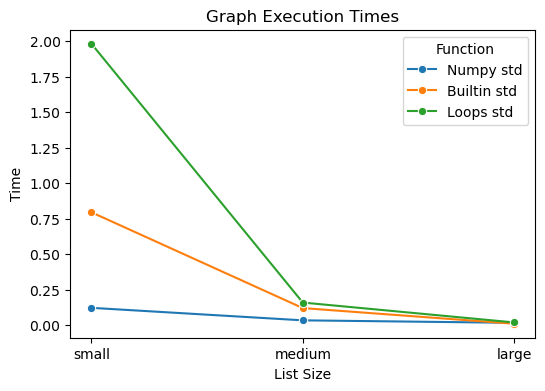

In [226]:
plt.figure(figsize=(6, 4))
ax = sns.lineplot(x='Size', y='Time', hue='Function', data=df, marker='o')

#plt.yscale('log')  # might be interesting to see from logarithmic perspective, as numbers are very far away from each other

plt.xlabel('List Size')
plt.ylabel('Time')
plt.title('Graph Execution Times')
plt.show()

This is some level of improvement. Yet at points of medium and especially large list size the results kind of bland together. I  am going to provide heatmap, to have better insight into running times.

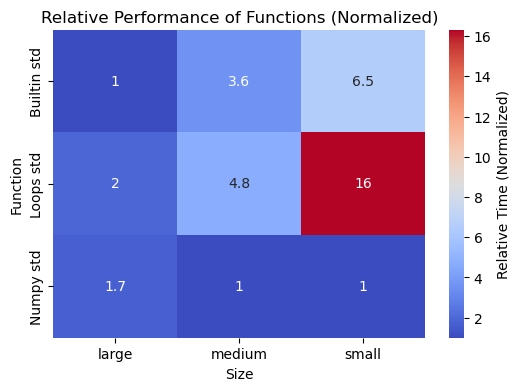

In [227]:
df_pivot = df.pivot(index='Function', columns='Size', values='Time')
normalized_df = df_pivot / df_pivot.min()

plt.figure(figsize=(6, 4))
sns.heatmap(normalized_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Relative Time'})
plt.title('Relative Performance')
plt.show()

Runtimes using `%timeit`. I get more precise results, yet somewhat difficult to read.

In [228]:
%timeit np.std(large_list)
%timeit np.std(medium_list)
%timeit np.std(small_list)

65.8 μs ± 23.8 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
242 μs ± 98.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.22 ms ± 356 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [229]:
%timeit std_loops(large_list)
%timeit std_loops(medium_list)
%timeit std_loops(small_list)

113 μs ± 46.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
530 μs ± 50.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
9.13 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [230]:
%timeit std_builtin(large_list)
%timeit std_builtin(medium_list)
%timeit std_builtin(small_list)

71.3 μs ± 21.7 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
567 μs ± 78.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.57 ms ± 968 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
